## **PREDICTIVE ANALYSIS USING MACHINE LEARNING**

INSTRUCTIONS:

BUILD A MACHINE LEARNING MODEL (E.G., REGRESSION OR CLASSIFICATION) TO PREDICT OUTCOMES BASED ON A DATASET.

1 – Install Dependencies

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn --quiet

2 – Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

3 – Load Dataset

In [ ]:
# Upload CSV from Colab left panel or mount Google Drive
file_path = "/content/Customer_Sentiment.csv"
df = pd.read_csv(file_path)

df.head()

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
0,1,male,60+,north,automobile,online,flipkart,1,very disappointed with the quality.,negative,46,yes,yes
1,2,other,46-60,central,books,online,swiggy instamart,5,fast delivery and great packaging.,positive,5,yes,no
2,3,female,36-45,east,sports,online,facebook marketplace,1,very disappointed with the quality.,negative,38,yes,yes
3,4,female,18-25,central,groceries,online,zepto,2,product stopped working after few days.,negative,16,yes,yes
4,5,female,18-25,east,electronics,online,croma,3,neutral about the quality.,neutral,15,yes,no


4 – Exploratory Data Analysis (EDA)

In [ ]:
print("Shape:", df.shape)

Shape: (25000, 13)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           25000 non-null  int64 
 1   gender                25000 non-null  object
 2   age_group             25000 non-null  object
 3   region                25000 non-null  object
 4   product_category      25000 non-null  object
 5   purchase_channel      25000 non-null  object
 6   platform              25000 non-null  object
 7   customer_rating       25000 non-null  int64 
 8   review_text           25000 non-null  object
 9   sentiment             25000 non-null  object
 10  response_time_hours   25000 non-null  int64 
 11  issue_resolved        25000 non-null  object
 12  complaint_registered  25000 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB
None


In [ ]:
print("\nMissing values:")


Missing values:


In [ ]:
print(df.isnull().sum())

customer_id             0
gender                  0
age_group               0
region                  0
product_category        0
purchase_channel        0
platform                0
customer_rating         0
review_text             0
sentiment               0
response_time_hours     0
issue_resolved          0
complaint_registered    0
dtype: int64


In [ ]:
df.describe(include='all')

,customer_id,gender,age_group,region,product_category,purchase_channel,platform,customer_rating,review_text,sentiment,response_time_hours,issue_resolved,complaint_registered
count,25000.000000,25000,25000,25000,25000,25000,25000,25000.000000,25000,25000,25000.000000,25000,25000
unique,NaN,3,5,5,9,1,20,NaN,15,3,NaN,2,2
top,NaN,male,46-60,west,groceries,online,nykaa,NaN,"amazing experience, highly recommend!",positive,NaN,yes,no
freq,NaN,8385,5059,5081,2858,25000,1301,NaN,2109,9978,NaN,16593,15063
mean,12500.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.002480,NaN,NaN,36.023480,NaN,NaN
std,7217.022701,NaN,NaN,NaN,NaN,NaN,NaN,1.404647,NaN,NaN,20.597941,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,6250.750000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,18.000000,NaN,NaN
50%,12500.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,36.000000,NaN,NaN
75%,18750.250000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,54.000000,NaN,NaN


In [ ]:
target_column = "Sentiment"

5 – Data Preprocessing

In [ ]:
# Encode target
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'sentiment']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

6 – Feature Selection

In [ ]:
X = df.drop(columns=["sentiment"])
y = df["sentiment"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

7 – Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 20000
Testing samples: 5000


8 – Train Logistic Regression

In [ ]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


 Logistic Regression Results
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       1.00      1.00      1.00      1021
           2       1.00      1.00      1.00      1982

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



9 – Train Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


 Random Forest Results
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       1.00      1.00      1.00      1021
           2       1.00      1.00      1.00      1982

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



10 – Confusion Matrix Visualization

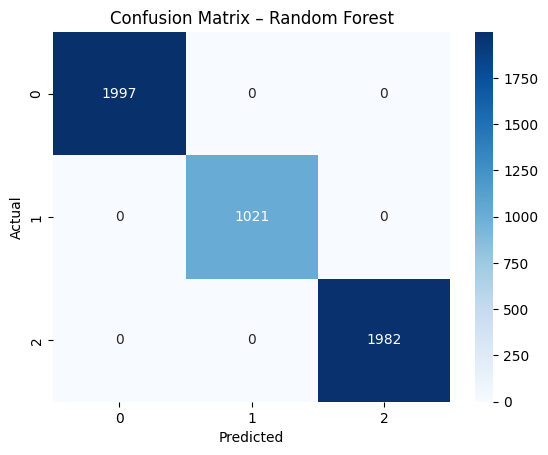

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix – Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()